# 12.1. Optimization and Deep Learning
- optimize algo to minimize loss function. also referred to as cost function or objective function of optimization problem.
- optimizing is to reduce training error. But deep learning trying to reduce generalization error.
- numerical optimization is to minimize a function.
Challenges - local minima, saddle points and vanishing gradients.

In [3]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

/home/athapar/miniconda3/lib/python3.11/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [4]:
# risk func f vs empirical risk func g
def f(x):
    return x * torch.cos(np.pi * x)
def g(x):
    return f(x) + .2 * torch.cos(5 * np.pi * x)

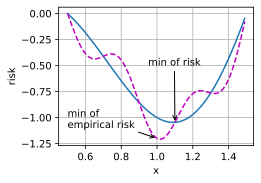

In [5]:
#minimum of the empirical risk on a training dataset may be at a different location
# from the minimum of the risk (generalization error).

def annotate(text, xy, xytext):  #@save
    d2l.plt.gca().annotate(text, xy=xy, xytext=xytext,
                           arrowprops=dict(arrowstyle='->'))

x = torch.arange(0.5, 1.5, 0.01)
d2l.set_figsize((4.5, 2.5))
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
annotate('min of\nempirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('min of risk', (1.1, -1.05), (0.95, -0.5))

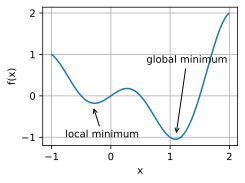

In [6]:
# local minima challenge
x = torch.arange(-1.0, 2.0, 0.01)
d2l.plot(x, [f(x), ], 'x', 'f(x)')
annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0))
annotate('global minimum', (1.1, -0.95), (0.6, 0.8))

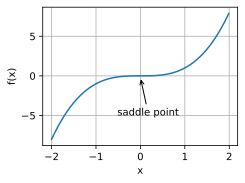

In [8]:
# saddle point - gradient is zero (vanishes), but not a local minimum
x = torch.arange(-2.0, 2.0, 0.01)
d2l.plot(x, [x ** 3], "x", "f(x)")
annotate('saddle point', (0, -0.2), (-0.52, -5.0))


/home/athapar/miniconda3/lib/python3.11/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


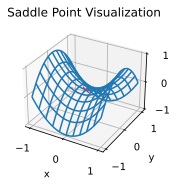

In [ ]:
# saddle point in 3D
# when eigen values of Hessian are both positive and negative
# the point is a saddle point
x, y = torch.meshgrid(
    torch.linspace(-1.0, 1.0, 101), torch.linspace(-1.0, 1.0, 101))
z = x**2 - y**2

ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 10, 'cstride': 10})
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y')
d2l.plt.title('Saddle Point Visualization');

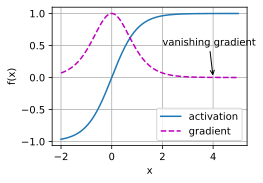

In [22]:
# vanishing gradients
# eg. using tanh activation function
x = torch.arange(-2.0, 5.0, 0.01)
d2l.plot(x, [torch.tanh(x), 1 - torch.tanh(x)** 2], 'x', 'f(x)')
d2l.plt.legend(['activation', 'gradient'])
annotate('vanishing gradient', (4, 0), (2.0, 0.5))
